# Introduce the Data

#### This data is data about cardiovascular and obtained from Kaggle and here is the link

#### https://www.kaggle.com/sulianova/cardiovascular-disease-dataset/kernels

### So the first thing to do is import some libraries from Python to make it easier for us to do data analysis and data cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Because the data we get from kaggle is still in the form of csv so we need to read the data and convert it to a data frame

In [2]:
dfTrain = pd.read_csv('cardio_train.csv',sep=';')
dfTrain.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### The first thing we will do is find out how much data we will be working on, wether there is data that is null or not

In [3]:
dfTrain.shape

(70000, 13)

In [4]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
dfTrain.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

### In the next step I will drop the ID column because it will not be used to analyze our data, and will also change the age, gender, cholesterol, and gluc columns to make it easier to understand

In [6]:
dfTrain.drop('id',axis=1,inplace=True)
dfTrain.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
dfTrain['age'] = dfTrain['age'].apply(
lambda i : round((i/365)))

In [8]:
dfTrain = dfTrain.replace({'gender':{1:'Female',2:'Male'}})
dfTrain = dfTrain.replace({'cholesterol':{1:'Normal',2:'Above Normal',3:'Well Above Normal'}})
dfTrain = dfTrain.replace({'gluc':{1:'Normal',2:'Above Normal',3:'Well Above Normal'}})
dfTrain.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,Male,168,62.0,110,80,Normal,Normal,0,0,1,0
1,55,Female,156,85.0,140,90,Well Above Normal,Normal,0,0,1,1
2,52,Female,165,64.0,130,70,Well Above Normal,Normal,0,0,0,1
3,48,Male,169,82.0,150,100,Normal,Normal,0,0,1,1
4,48,Female,156,56.0,100,60,Normal,Normal,0,0,0,0


# EDA

### Before we analyze the data and clean up our data we should describe our data so we know what the next steps are

In [9]:
dfTrain.describe()

,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,164.359229,74.205690,128.817286,96.630414,0.088129,0.053771,0.803729,0.499700
std,6.765294,8.210126,14.395757,154.011419,188.472530,0.283484,0.225568,0.397179,0.500003
min,30.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,250.000000,200.000000,16020.000000,11000.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
listItem = []
for col in dfTrain.columns:
    listItem.append([col,dfTrain[col].dtype, dfTrain[col].isna().sum(),
                   round((dfTrain[col].isna().sum()/len(dfTrain[col]))*100,2),
                   dfTrain[col].nunique(),list(dfTrain[col].unique()[:2])])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType','null','nullPct','unique','uniqueSample'],data = listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,28,"[50, 55]"
1,gender,object,0,0.0,2,"[Male, Female]"
2,height,int64,0,0.0,109,"[168, 156]"
3,weight,float64,0,0.0,287,"[62.0, 85.0]"
4,ap_hi,int64,0,0.0,153,"[110, 140]"
5,ap_lo,int64,0,0.0,157,"[80, 90]"
6,cholesterol,object,0,0.0,3,"[Normal, Well Above Normal]"
7,gluc,object,0,0.0,3,"[Normal, Above Normal]"
8,smoke,int64,0,0.0,2,"[0, 1]"
9,alco,int64,0,0.0,2,"[0, 1]"


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

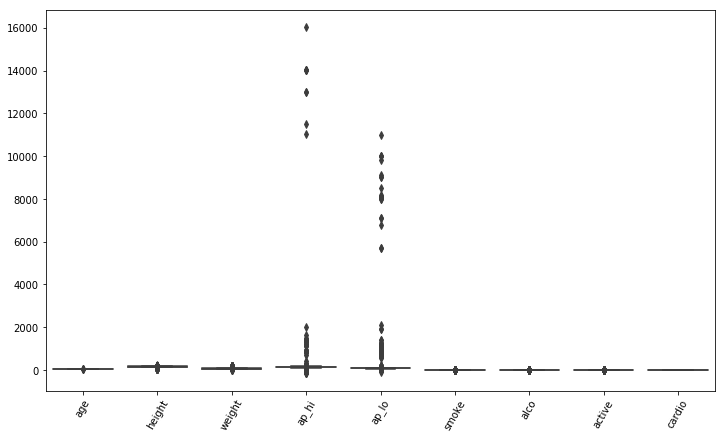

In [11]:
plt.figure(figsize=(12,7))
sns.boxplot(data=dfTrain)
plt.xticks(rotation=60)

### It can be seen from the boxplot above that there are outliers in the ap_hi and ap_lo columns which are very extreme, what about the other columns? we will discuss it in a moment

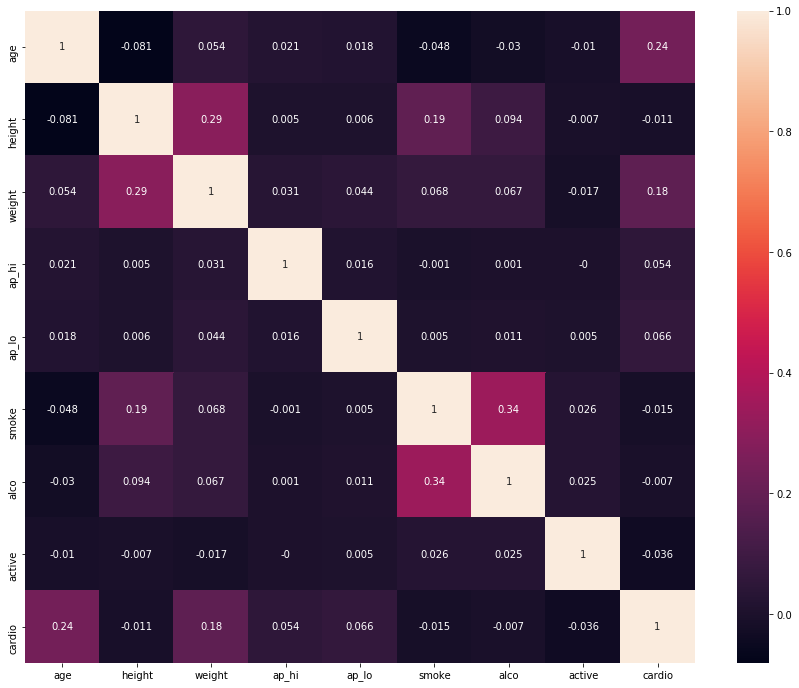

In [12]:
plt.figure(figsize=(15,12))
sns.heatmap(round(dfTrain.corr(),3),annot=True)

# Age Column

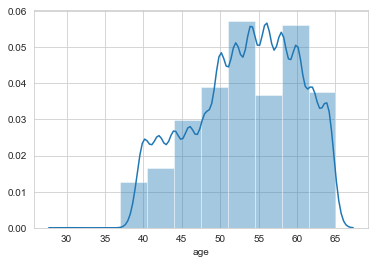

In [13]:
sns.set_style('whitegrid')
sns.distplot(dfTrain['age'],bins=10)

# Height Column

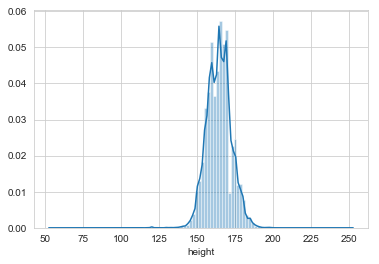

In [14]:
sns.distplot(dfTrain['height'],bins=100)

In [ ]:
### If seen from the distribution plot above it can be seen that there are outliers. so we will try to eliminate outliers by pulling outliers or using IQR and determine which way is best so that the data outliers removed do not have a big influence on our initial data

<Figure size 1440x864 with 0 Axes>

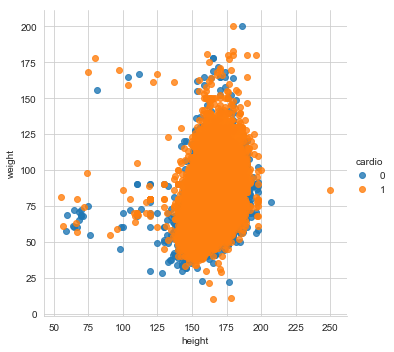

In [15]:
plt.figure(figsize=(20,12))
sns.lmplot(x='height',y='weight',hue='cardio',data=dfTrain,fit_reg=False)

# Remove outlier height column with IQR

In [16]:
ap_hi_q3 = dfTrain['height'].quantile(0.75)
ap_hi_q1 = dfTrain['height'].quantile(0.25)
IQR = ap_hi_q3 - ap_hi_q1
min = ap_hi_q1 - (1.5*IQR)
max = ap_hi_q3 + (1.5*IQR)
outlier = dfTrain[(dfTrain['height'] > max)|(dfTrain['height'] < min)]
print('Min Limit : ',min)
print('Max Limit : ',max)
print('Number of Outliers : ', len(outlier))

Min Limit :  142.5
Max Limit :  186.5
Number of Outliers :  519


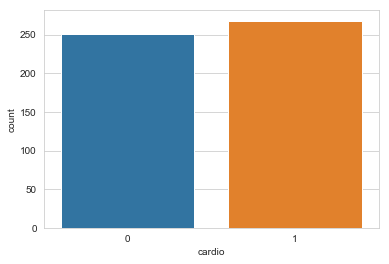

In [17]:
sns.countplot(x='cardio',data=outlier)

# Remove outlier height column with STD

In [18]:
min = dfTrain.height.mean() - (2*(np.std(dfTrain['height'])))
max = dfTrain.height.mean() + (2*(np.std(dfTrain['height'])))
outlier = dfTrain[(dfTrain['height'] > max)|(dfTrain['height'] < min)]
print('Min Limit : ',round(min,1))
print('Max Limit : ',round(max,1))
print('Number of Outliers : ', len(outlier))

Min Limit :  147.9
Max Limit :  180.8
Number of Outliers :  2335


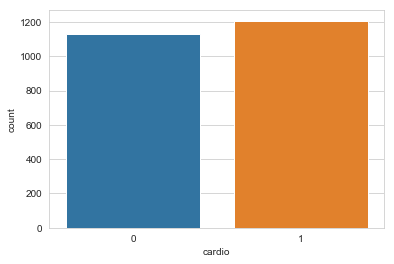

In [19]:
sns.countplot(x='cardio',data=outlier)

In [20]:
min = dfTrain.height.mean() - (3*(np.std(dfTrain['height'])))
max = dfTrain.height.mean() + (3*(np.std(dfTrain['height'])))
outlier = dfTrain[(dfTrain['height'] > max)|(dfTrain['height'] < min)]
print('Min Limit: ',round(min,1))
print('Max Limit: ',round(max,1))
print('Number of Outliers : ', len(outlier))

Min Limit:  139.7
Max Limit:  189.0
Number of Outliers :  293


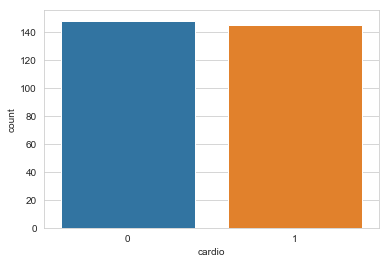

In [21]:
sns.countplot(x='cardio',data=outlier)

# Result 

In [22]:
ap_hi_q3 = dfTrain['height'].quantile(0.75)
ap_hi_q1 = dfTrain['height'].quantile(0.25)
IQR = ap_hi_q3 - ap_hi_q1
min = ap_hi_q1 - (1.5*IQR)
max = ap_hi_q3 + (1.5*IQR)
dfTrain.drop(dfTrain[(dfTrain['height'] > max)|(dfTrain['height'] < min)].index,inplace=True)

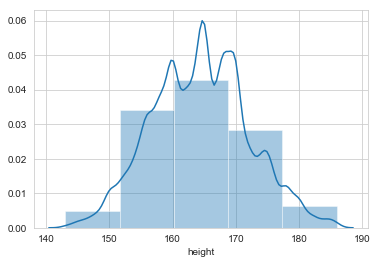

In [23]:
sns.distplot(dfTrain['height'],bins=5)

<Figure size 1440x864 with 0 Axes>

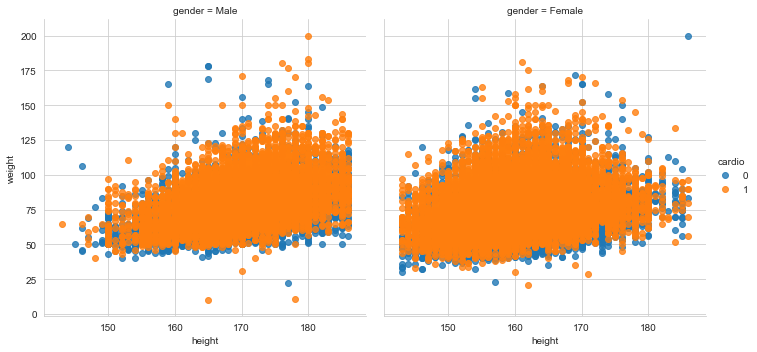

In [24]:
plt.figure(figsize=(20,12))
sns.lmplot(x='height',y='weight',hue='cardio',col='gender',data=dfTrain,fit_reg=False)

In [25]:
dfTrain.shape

(69481, 12)

# Weight Column

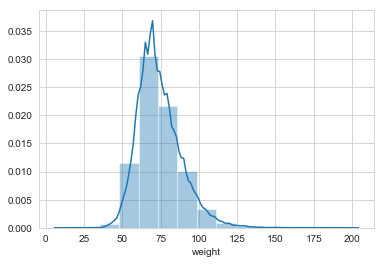

In [26]:
sns.distplot(dfTrain.weight,bins=15)

# Remove outliers weight column dengan IQR

In [27]:
ap_hi_q3 = dfTrain['weight'].quantile(0.75)
ap_hi_q1 = dfTrain['weight'].quantile(0.25)
IQR = ap_hi_q3 - ap_hi_q1
min = ap_hi_q1 - (1.5*IQR)
max = ap_hi_q3 + (1.5*IQR)
outlier = dfTrain[(dfTrain['weight'] > max)|(dfTrain['weight'] < min)]
print('Min Limit : ',min)
print('Max Limit : ',max)
print('Number of Outliers : ', len(outlier))

Min Limit :  39.5
Max Limit :  107.5
Number of Outliers :  1758


1    1218
0     540
Name: cardio, dtype: int64 



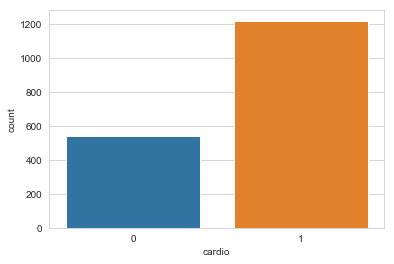

In [28]:
sns.countplot(x='cardio',data=outlier)
print(outlier.cardio.value_counts(),'\n')

# Remove outliers weight column with STD

In [29]:
min = dfTrain.weight.mean() - (2*(np.std(dfTrain['weight'])))
max = dfTrain.weight.mean() + (2*(np.std(dfTrain['weight'])))
outlier = dfTrain[(dfTrain['weight'] > max)|(dfTrain['weight'] < min)]
print('Min Limit : ',round(min,1))
print('Max Limit : ',round(max,1))
print('Number of Outliers : ', len(outlier))

Min Limit :  45.6
Max Limit :  102.7
Number of Outliers :  3139


1    2019
0    1120
Name: cardio, dtype: int64 



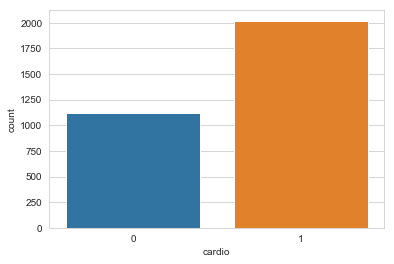

In [30]:
sns.countplot(x='cardio',data=outlier)
print(outlier.cardio.value_counts(),'\n')

In [31]:
min = dfTrain.weight.mean() - (3*(np.std(dfTrain['weight'])))
max = dfTrain.weight.mean() + (3*(np.std(dfTrain['weight'])))
outlier = dfTrain[(dfTrain['weight'] > max)|(dfTrain['weight'] < min)]
print('Min Limit : ',round(min,1))
print('Max Limit : ',round(max,1))
print('Number of Outliers : ', len(outlier))

Min Limit :  31.3
Max Limit :  117.0
Number of Outliers :  669


1    481
0    188
Name: cardio, dtype: int64 



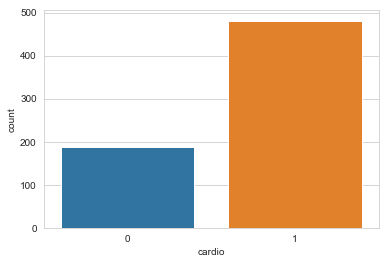

In [32]:
sns.countplot(x='cardio',data=outlier)
print(outlier.cardio.value_counts(),'\n')

# Result

In [33]:
ap_hi_q3 = dfTrain['weight'].quantile(0.75)
ap_hi_q1 = dfTrain['weight'].quantile(0.25)
IQR = ap_hi_q3 - ap_hi_q1
min = ap_hi_q1 - (1.5*IQR)
max = ap_hi_q3 + (1.5*IQR)
dfTrain.drop(dfTrain[(dfTrain['weight'] > max)|(dfTrain['weight'] < min)].index,inplace=True)

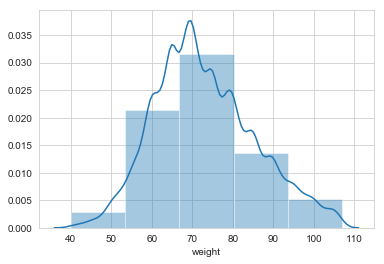

In [34]:
sns.distplot(dfTrain['weight'],bins=5)

In [35]:
dfTrain.shape

(67723, 12)

# ap_hi Column

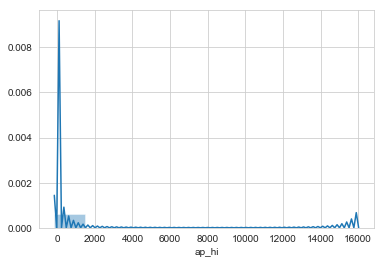

In [36]:
sns.distplot(dfTrain['ap_hi'],bins=10)

# Remove outlier ap_hi column with IQR

In [37]:
ap_hi_q3 = dfTrain['ap_hi'].quantile(0.75)
ap_hi_q1 = dfTrain['ap_hi'].quantile(0.25)
IQR = ap_hi_q3 - ap_hi_q1
min = ap_hi_q1 - (1.5*IQR)
max = ap_hi_q3 + (1.5*IQR)
outlier = dfTrain[(dfTrain['ap_hi'] > max)|(dfTrain['ap_hi'] < min)]
print('Min Limit : ',min)
print('Max Limit : ',max)
print('Number of Outliers : ', len(outlier))

Min Limit :  90.0
Max Limit :  170.0
Number of Outliers :  1309


1    983
0    326
Name: cardio, dtype: int64 



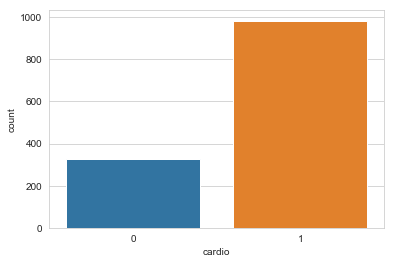

In [38]:
sns.countplot(x='cardio',data=outlier)
print(outlier.cardio.value_counts(),'\n')

In [39]:
ap_hi_q3 = dfTrain['ap_hi'].quantile(0.75)
ap_hi_q1 = dfTrain['ap_hi'].quantile(0.25)
IQR = ap_hi_q3 - ap_hi_q1

In [40]:
min = ap_hi_q1 - (1.5*IQR)
max = ap_hi_q3 + (1.5*IQR)
dfTrain.drop(dfTrain[(dfTrain['ap_hi'] > max)|(dfTrain['ap_hi'] < min)].index,inplace=True)

# Result

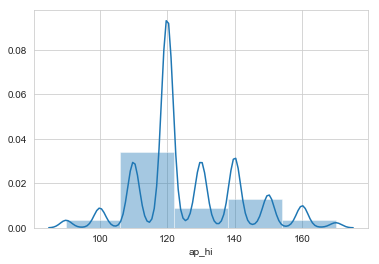

In [41]:
sns.distplot(dfTrain['ap_hi'],bins=5)

In [42]:
dfTrain.shape

(66414, 12)

# ap_lo Column

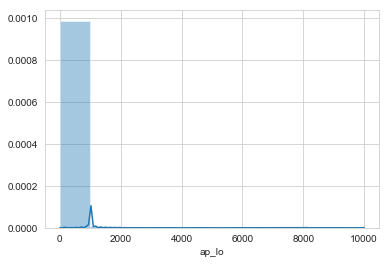

In [43]:
sns.distplot(dfTrain['ap_lo'],bins=10)

# Remove outlier ap_lo column with IQR

In [44]:
ap_hi_q3 = dfTrain['ap_lo'].quantile(0.75)
ap_hi_q1 = dfTrain['ap_lo'].quantile(0.25)
IQR = ap_hi_q3 - ap_hi_q1
min = ap_hi_q1 - (1.5*IQR)
max = ap_hi_q3 + (1.5*IQR)
outlier = dfTrain[(dfTrain['ap_lo'] > max)|(dfTrain['ap_lo'] < min)]
print('Min Limit : ',min)
print('Max Limit : ',max)
print('Number of Outliers : ', len(outlier))

Min Limit :  65.0
Max Limit :  105.0
Number of Outliers :  3909


0    2269
1    1640
Name: cardio, dtype: int64 



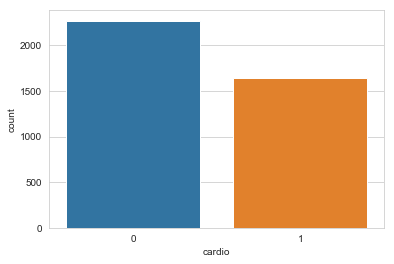

In [45]:
sns.countplot(x='cardio',data=outlier)
print(outlier.cardio.value_counts(),'\n')

In [46]:
ap_lo_q3 = dfTrain['ap_lo'].quantile(0.75)
ap_lo_q1 = dfTrain['ap_lo'].quantile(0.25)
IQR = ap_lo_q3 - ap_lo_q1
min = ap_lo_q1 - (1.5*IQR)
max = ap_lo_q3 + (1.5*IQR)
dfTrain.drop(dfTrain[(dfTrain['ap_lo'] > max)|(dfTrain['ap_lo'] < min)].index,inplace=True)

# Result

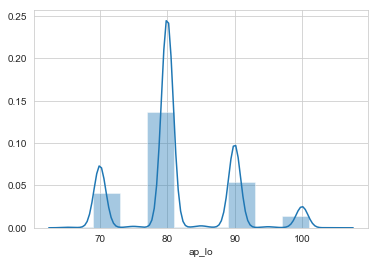

In [47]:
sns.distplot(dfTrain['ap_lo'],bins=10)

In [48]:
dfTrain.shape

(62505, 12)

0    31635
1    30870
Name: cardio, dtype: int64 



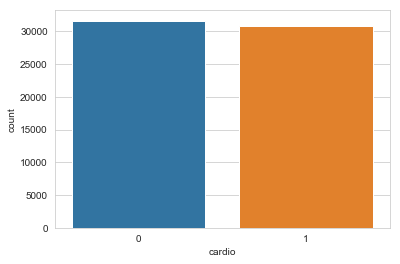

In [49]:
sns.countplot(x='cardio',data=dfTrain)
print(dfTrain.cardio.value_counts(),'\n')

Female    40718
Male      21787
Name: gender, dtype: int64 



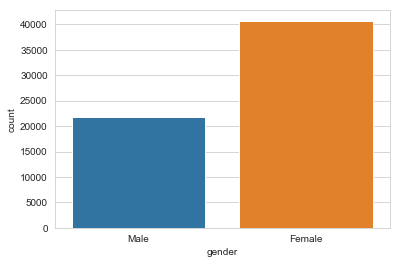

In [50]:
sns.countplot(dfTrain['gender'])
print(dfTrain.gender.value_counts(),'\n')

cardio  gender
0       Female    20537
        Male      11098
1       Female    20181
        Male      10689
Name: gender, dtype: int64


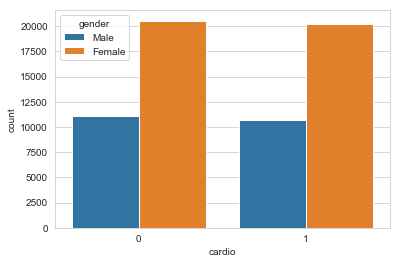

In [51]:
sns.countplot(x='cardio',hue='gender',data=dfTrain)
print(dfTrain.groupby('cardio').gender.value_counts())

Normal               47214
Above Normal          8224
Well Above Normal     7067
Name: cholesterol, dtype: int64 



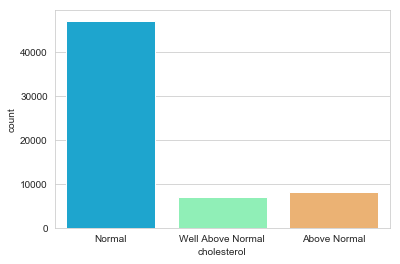

In [52]:
sns.countplot(x='cholesterol',data=dfTrain,palette='rainbow')
print(dfTrain.cholesterol.value_counts(),'\n')

cardio  cholesterol      
0       Normal               26617
        Above Normal          3325
        Well Above Normal     1693
1       Normal               20597
        Well Above Normal     5374
        Above Normal          4899
Name: cholesterol, dtype: int64


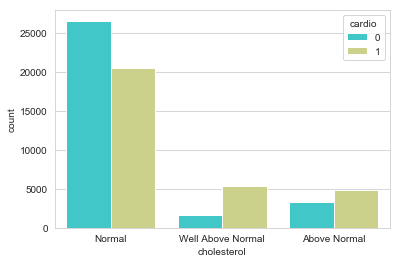

In [53]:
sns.countplot(x='cholesterol',hue='cardio',data=dfTrain,palette='rainbow')
print(dfTrain.groupby('cardio').cholesterol.value_counts())

In [54]:
list = []
for i in dfTrain.cholesterol.unique():
    list.append([i,len(dfTrain[(dfTrain['cardio']==0)&(dfTrain['cholesterol']==i)])/len(dfTrain[dfTrain['cholesterol']==i])*100,len(dfTrain[(dfTrain['cardio']==1)&(dfTrain['cholesterol']==i)])/len(dfTrain[dfTrain['cholesterol']==i])*100])
df = pd.DataFrame(data=list,columns=['cholesterol','No Disease%','Have Disease%']).sort_values(by=['Have Disease%'],ascending=False)
df

,cholesterol,No Disease%,Have Disease%
1,Well Above Normal,23.956417,76.043583
2,Above Normal,40.430447,59.569553
0,Normal,56.375228,43.624772


Normal               53408
Well Above Normal     4694
Above Normal          4403
Name: gluc, dtype: int64 



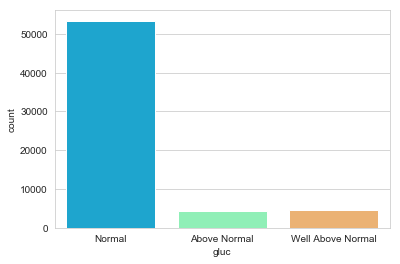

In [57]:
sns.countplot(x='gluc',data=dfTrain,palette='rainbow')
print(dfTrain.gluc.value_counts(),'\n')

cardio  gluc             
0       Normal               27982
        Above Normal          1847
        Well Above Normal     1806
1       Normal               25426
        Well Above Normal     2888
        Above Normal          2556
Name: gluc, dtype: int64


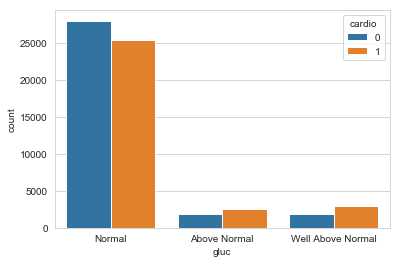

In [58]:
sns.countplot(x='gluc',hue='cardio',data=dfTrain)
print(dfTrain.groupby('cardio').gluc.value_counts())

In [59]:
list = []
for i in dfTrain.cholesterol.unique():
    list.append([i,len(dfTrain[(dfTrain['cardio']==0)&(dfTrain['gluc']==i)])/len(dfTrain[dfTrain['gluc']==i])*100,len(dfTrain[(dfTrain['cardio']==1)&(dfTrain['gluc']==i)])/len(dfTrain[dfTrain['gluc']==i])*100])
df = pd.DataFrame(data=list,columns=['gluc','No Disease%','Have Disease%']).sort_values(by=['Have Disease%'],ascending=False)
df

,gluc,No Disease%,Have Disease%
1,Well Above Normal,38.474648,61.525352
2,Above Normal,41.948671,58.051329
0,Normal,52.392900,47.607100


cardio  smoke
0       0        28709
        1         2926
1       0        28399
        1         2471
Name: smoke, dtype: int64


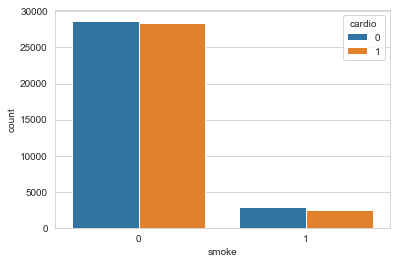

In [60]:
sns.countplot(x='smoke',hue='cardio',data=dfTrain)
print(dfTrain.groupby('cardio').smoke.value_counts())

cardio  active
0       1         25912
        0          5723
1       1         24362
        0          6508
Name: active, dtype: int64


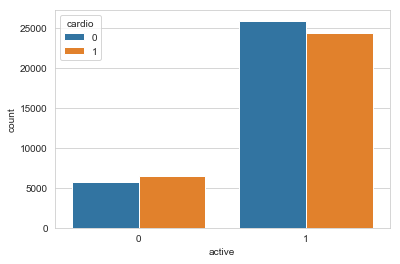

In [61]:
sns.countplot(x='active',hue='cardio',data=dfTrain)
print(dfTrain.groupby('cardio').active.value_counts())

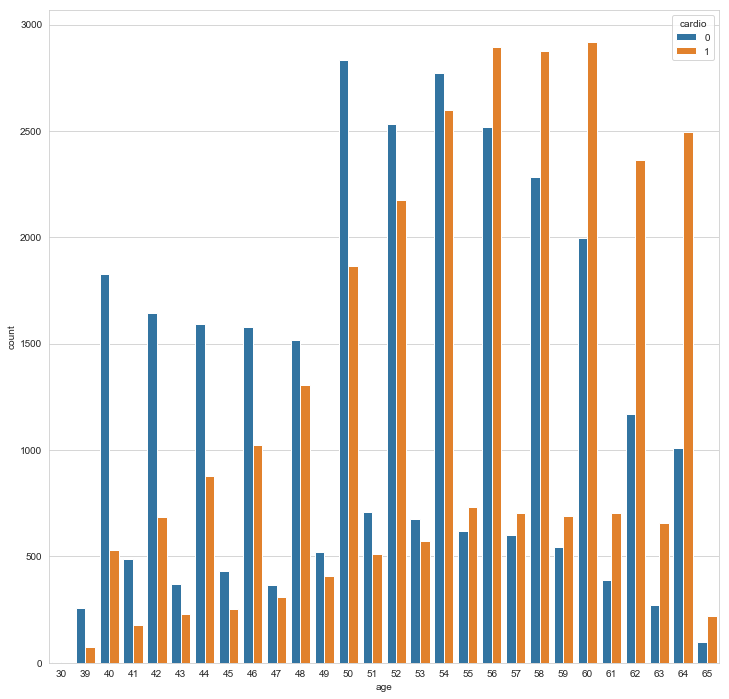

In [62]:
plt.figure(figsize=(12,12))
sns.countplot(x='age',hue='cardio',data=dfTrain)

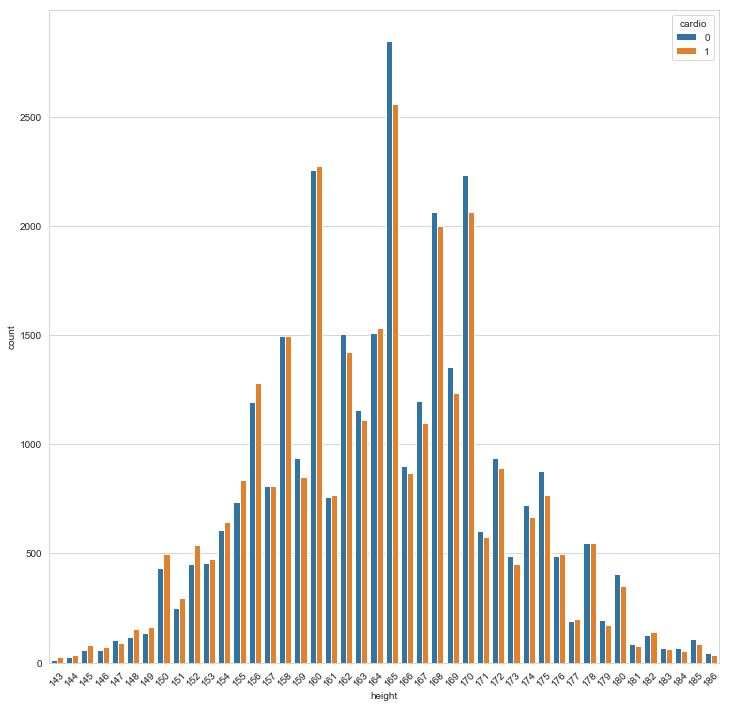

In [63]:
plt.figure(figsize=(12,12))
sns.countplot(x='height',hue='cardio',data=dfTrain)
plt.xticks(rotation=45)
plt.show()

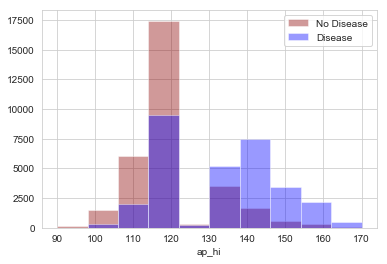

In [64]:
sns.distplot(dfTrain[dfTrain['cardio']==0]['ap_hi'],kde=False,color='darkred',bins=10,label='No Disease')
sns.distplot(dfTrain[dfTrain['cardio']==1]['ap_hi'],kde=False,color='blue',bins=10,label='Disease')
plt.legend()

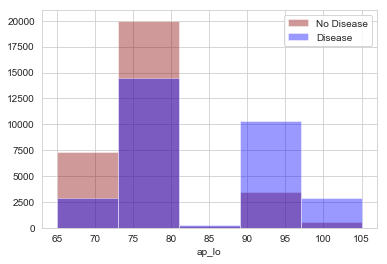

In [65]:
sns.distplot(dfTrain[dfTrain['cardio']==0]['ap_lo'],kde=False,color='darkred',bins=5,label='No Disease')
sns.distplot(dfTrain[dfTrain['cardio']==1]['ap_lo'],kde=False,color='blue',bins=5,label='Disease')
plt.legend()

<Figure size 1440x864 with 0 Axes>

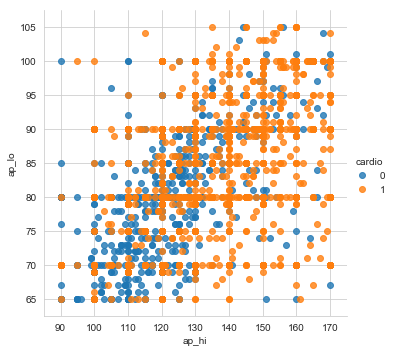

In [66]:
plt.figure(figsize=(20,12))
sns.lmplot(x='ap_hi',y='ap_lo',hue='cardio',data=dfTrain,fit_reg=False)

<Figure size 1440x864 with 0 Axes>

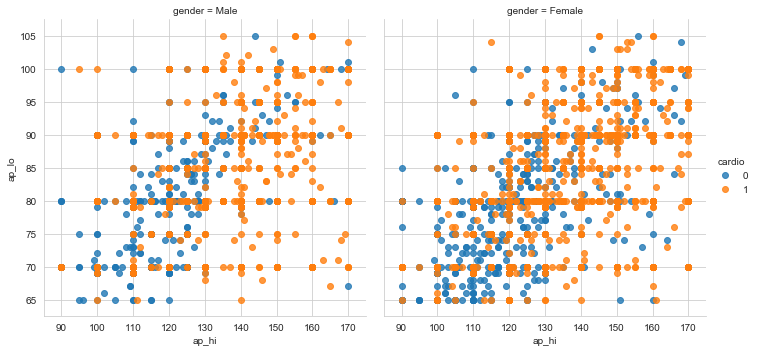

In [67]:
plt.figure(figsize=(20,12))
sns.lmplot(x='ap_hi',y='ap_lo',hue='cardio',col='gender',data=dfTrain,fit_reg=False)

<Figure size 1440x864 with 0 Axes>

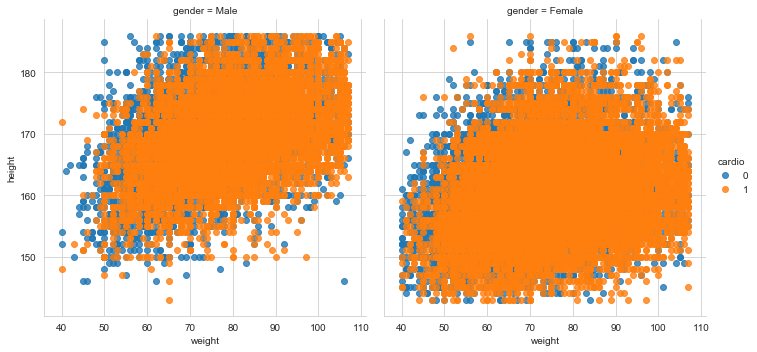

In [68]:
plt.figure(figsize=(20,12))
sns.lmplot(x='weight',y='height',hue='cardio',col='gender',data=dfTrain,fit_reg=False)

<Figure size 1440x864 with 0 Axes>

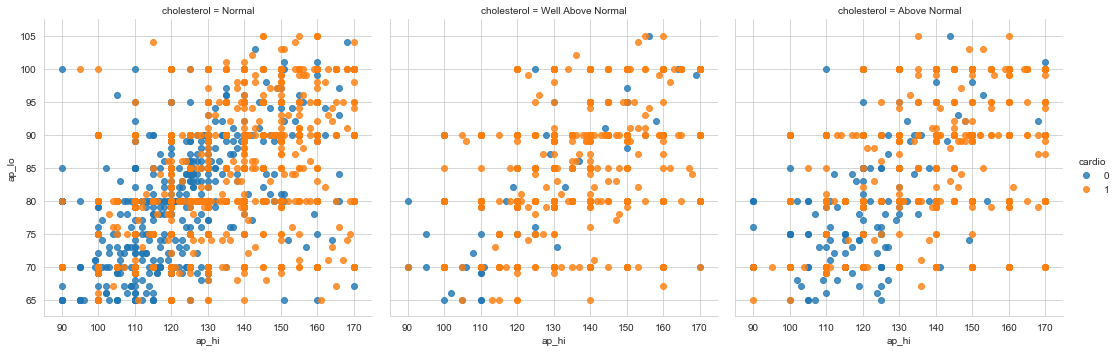

In [69]:
plt.figure(figsize=(20,12))
sns.lmplot(x='ap_hi',y='ap_lo',hue='cardio',col='cholesterol',data=dfTrain,fit_reg=False)

Text(0.5, 1.0, 'Normal')

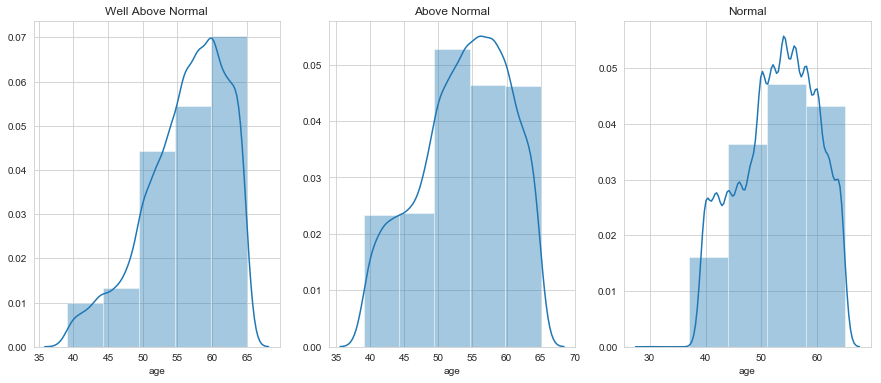

In [70]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.distplot(dfTrain[dfTrain['cholesterol']=='Well Above Normal']['age'],bins=5)
plt.title('Well Above Normal')
plt.subplot(1,3,2)
sns.distplot(dfTrain[dfTrain['cholesterol']=='Above Normal']['age'],bins=5)
plt.title('Above Normal')
plt.subplot(1,3,3)
sns.distplot(dfTrain[dfTrain['cholesterol']=='Normal']['age'],bins=5)
plt.title('Normal')

<Figure size 1440x864 with 0 Axes>

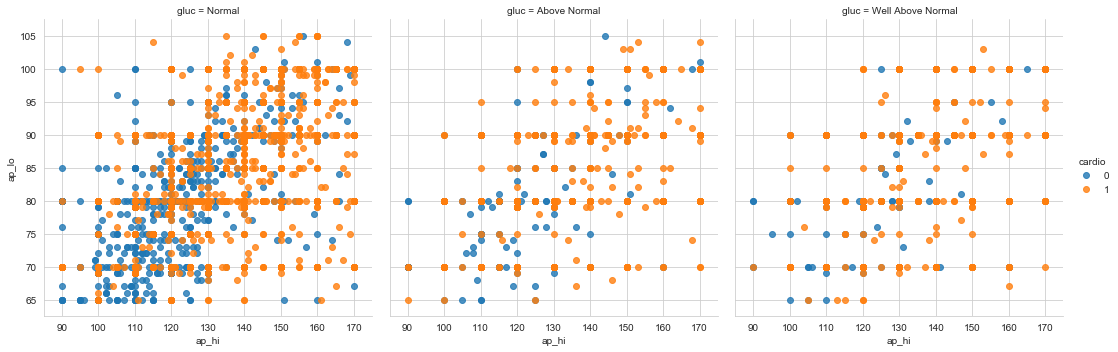

In [71]:
plt.figure(figsize=(20,12))
sns.lmplot(x='ap_hi',y='ap_lo',hue='cardio',col='gluc',data=dfTrain,fit_reg=False)

Text(0.5, 1.0, 'Normal')

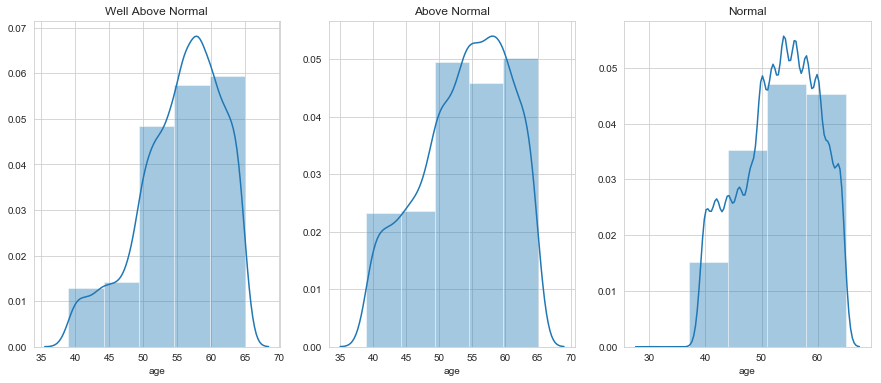

In [72]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.distplot(dfTrain[dfTrain['gluc']=='Well Above Normal']['age'],bins=5)
plt.title('Well Above Normal')
plt.subplot(1,3,2)
sns.distplot(dfTrain[dfTrain['gluc']=='Above Normal']['age'],bins=5)
plt.title('Above Normal')
plt.subplot(1,3,3)
sns.distplot(dfTrain[dfTrain['gluc']=='Normal']['age'],bins=5)
plt.title('Normal')

<Figure size 1440x864 with 0 Axes>

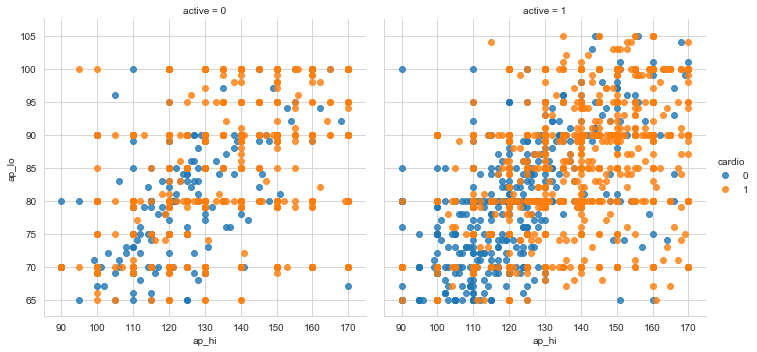

In [73]:
plt.figure(figsize=(20,12))
sns.lmplot(x='ap_hi',y='ap_lo',hue='cardio',col='active',data=dfTrain,fit_reg=False)

<Figure size 1440x864 with 0 Axes>

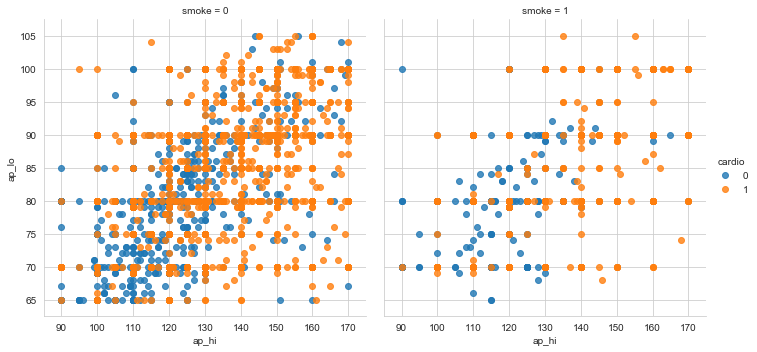

In [74]:
plt.figure(figsize=(20,12))
sns.lmplot(x='ap_hi',y='ap_lo',hue='cardio',col='smoke',data=dfTrain,fit_reg=False)

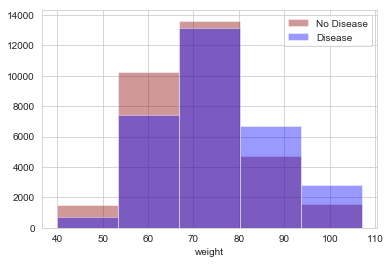

In [75]:
sns.distplot(dfTrain[dfTrain['cardio']==0]['weight'],kde=False,color='darkred',bins=5,label='No Disease')
sns.distplot(dfTrain[dfTrain['cardio']==1]['weight'],kde=False,color='blue',bins=5,label='Disease')
plt.legend()

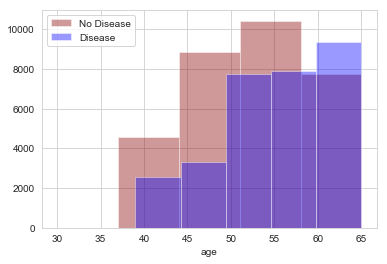

In [76]:
sns.distplot(dfTrain[dfTrain['cardio']==0]['age'],kde=False,color='darkred',bins=5,label='No Disease')
sns.distplot(dfTrain[dfTrain['cardio']==1]['age'],kde=False,color='blue',bins=5,label='Disease')
plt.legend()

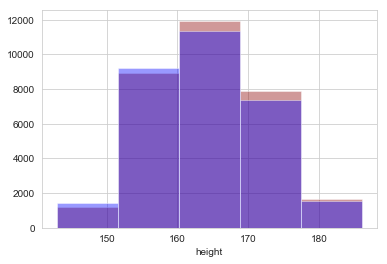

In [77]:
sns.distplot(dfTrain[dfTrain['cardio']==0]['height'],kde=False,color='darkred',bins=5)
sns.distplot(dfTrain[dfTrain['cardio']==1]['height'],kde=False,color='blue',bins=5)

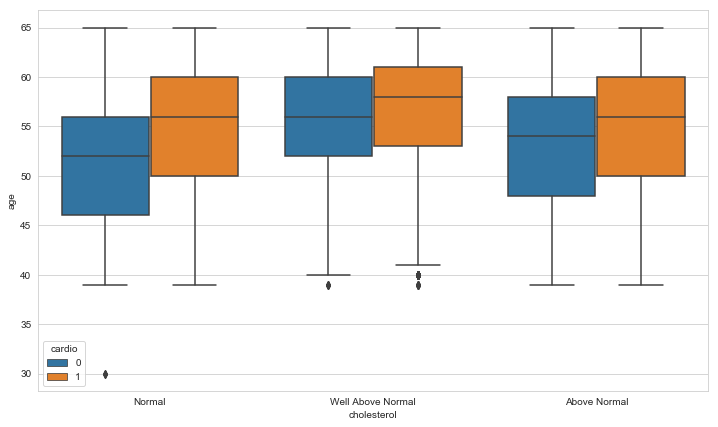

In [78]:
plt.figure(figsize=(12,7))
sns.boxplot(x='cholesterol',y='age',hue='cardio',data=dfTrain)

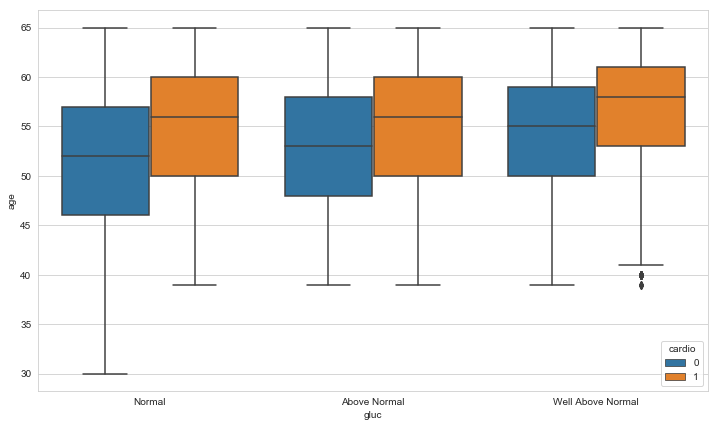

In [79]:
plt.figure(figsize=(12,7))
sns.boxplot(x='gluc',y='age',hue='cardio',data=dfTrain)

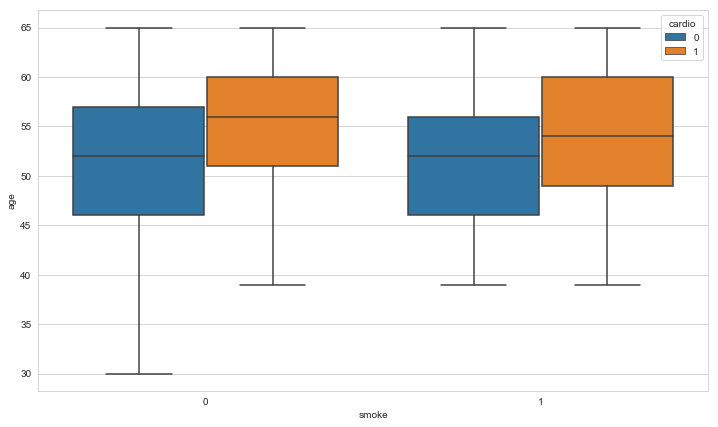

In [80]:
plt.figure(figsize=(12,7))
sns.boxplot(x='smoke',y='age',hue='cardio',data=dfTrain)

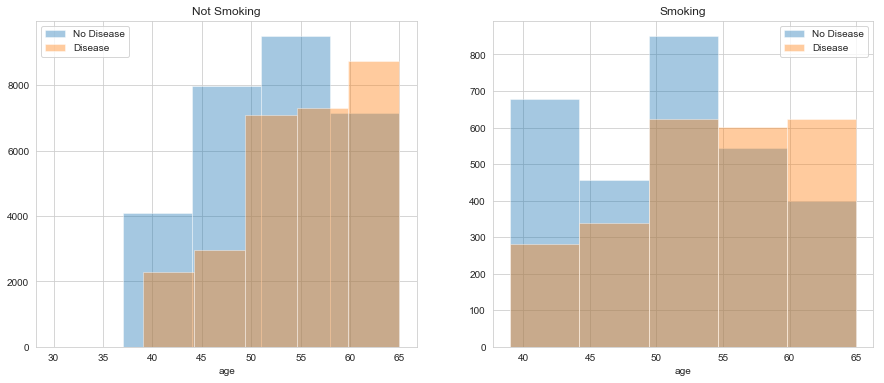

In [81]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(dfTrain[(dfTrain['smoke']==0)&(dfTrain['cardio']==0)]['age'],bins=5,kde=False,label='No Disease')
sns.distplot(dfTrain[(dfTrain['smoke']==0)&(dfTrain['cardio']==1)]['age'],bins=5,kde=False,label='Disease')
plt.title('Not Smoking')
plt.legend()
plt.subplot(1,2,2)
sns.distplot(dfTrain[(dfTrain['smoke']==1)&(dfTrain['cardio']==0)]['age'],bins=5,kde=False,label='No Disease')
sns.distplot(dfTrain[(dfTrain['smoke']==1)&(dfTrain['cardio']==1)]['age'],bins=5,kde=False,label='Disease')
plt.title('Smoking')
plt.legend()

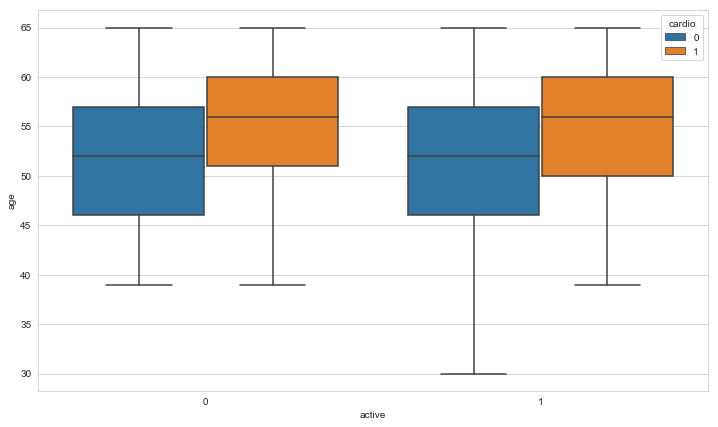

In [82]:
plt.figure(figsize=(12,7))
sns.boxplot(x='active',y='age',hue='cardio',data=dfTrain)

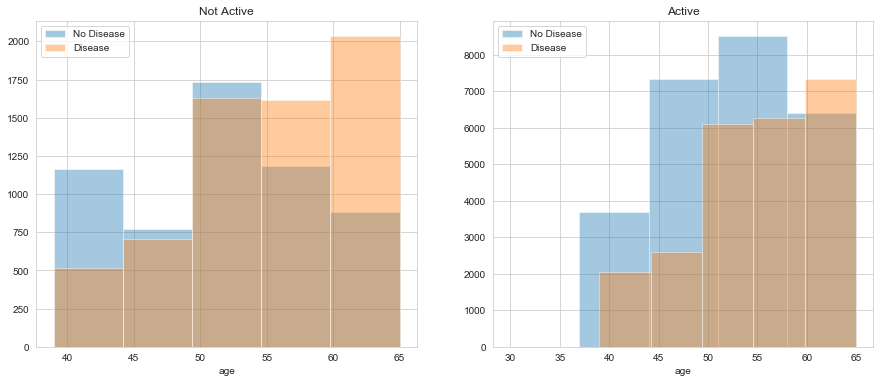

In [83]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(dfTrain[(dfTrain['active']==0)&(dfTrain['cardio']==0)]['age'],bins=5,kde=False,label='No Disease')
sns.distplot(dfTrain[(dfTrain['active']==0)&(dfTrain['cardio']==1)]['age'],bins=5,kde=False,label='Disease')
plt.title('Not Active')
plt.legend()
plt.subplot(1,2,2)
sns.distplot(dfTrain[(dfTrain['active']==1)&(dfTrain['cardio']==0)]['age'],bins=5,kde=False,label='No Disease')
sns.distplot(dfTrain[(dfTrain['active']==1)&(dfTrain['cardio']==1)]['age'],bins=5,kde=False,label='Disease')
plt.title('Active')
plt.legend()

# One Hot Encoding

In [84]:
for col_name in dfTrain.columns:
    if dfTrain[col_name].dtypes == 'object':
        unique_cat = len(dfTrain[col_name].unique())
        print('Feature {col_name} has {unique_cat} unique categories'.format(
        col_name=col_name, unique_cat=unique_cat))

Feature gender has 2 unique categories
Feature cholesterol has 3 unique categories
Feature gluc has 3 unique categories


In [85]:
print(dfTrain['gender'].value_counts(),'\n')
print(dfTrain['cholesterol'].value_counts(),'\n')
print(dfTrain['gluc'].value_counts(),'\n')

Female    40718
Male      21787
Name: gender, dtype: int64 

Normal               47214
Above Normal          8224
Well Above Normal     7067
Name: cholesterol, dtype: int64 

Normal               53408
Well Above Normal     4694
Above Normal          4403
Name: gluc, dtype: int64 



In [86]:
dummies_col = ['gender','cholesterol','gluc']
for col in dummies_col:
    dummies = pd.get_dummies(dfTrain[col],prefix=col,drop_first=True)
    dfTrain = pd.concat([dfTrain,dummies],axis=1)
    dfTrain.drop(col,axis=1,inplace=True)
dfTrain.head()

,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,gender_Male,cholesterol_Normal,cholesterol_Well Above Normal,gluc_Normal,gluc_Well Above Normal
0,50,168,62.0,110,80,0,0,1,0,1,1,0,1,0
1,55,156,85.0,140,90,0,0,1,1,0,0,1,1,0
2,52,165,64.0,130,70,0,0,0,1,0,0,1,1,0
3,48,169,82.0,150,100,0,0,1,1,1,1,0,1,0
5,60,151,67.0,120,80,0,0,0,0,0,0,0,0,0


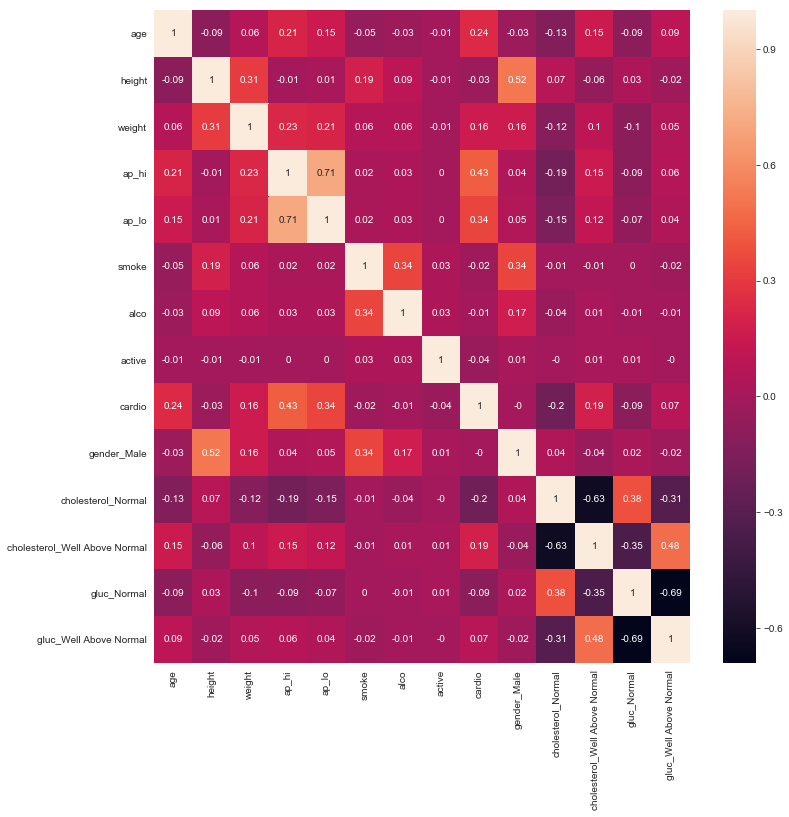

In [87]:
plt.figure(figsize=(12,12))
sns.heatmap(round(dfTrain.corr(),2),annot=True)

# Train Test Split

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
xtr, xts, ytr, yts = train_test_split(dfTrain.drop(['cardio'],axis=1), dfTrain['cardio'], test_size=.2,random_state=101)

In [90]:
xtr.head()

,age,height,weight,ap_hi,ap_lo,smoke,alco,active,gender_Male,cholesterol_Normal,cholesterol_Well Above Normal,gluc_Normal,gluc_Well Above Normal
48344,52,170,87.0,130,90,0,0,0,1,1,0,1,0
26469,65,169,80.0,120,80,0,0,1,0,1,0,1,0
55661,60,154,76.0,120,80,0,0,1,0,1,0,1,0
37703,53,176,80.0,160,90,0,0,1,1,1,0,1,0
14439,47,168,68.0,120,80,0,0,0,1,1,0,1,0


In [91]:
ytr.head()

48344    1
26469    0
55661    1
37703    1
14439    1
Name: cardio, dtype: int64

In [92]:
xts.head()

,age,height,weight,ap_hi,ap_lo,smoke,alco,active,gender_Male,cholesterol_Normal,cholesterol_Well Above Normal,gluc_Normal,gluc_Well Above Normal
37227,51,173,86.0,130,80,0,0,1,1,1,0,1,0
58667,58,157,69.0,110,80,1,0,1,1,0,1,0,1
4921,62,163,69.0,110,80,0,0,1,1,0,0,1,0
35130,44,159,56.0,110,70,0,0,1,0,1,0,1,0
18971,51,160,71.0,140,90,0,0,0,0,1,0,1,0


# Random Forest Classifier
# Training Model

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(xtr,ytr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Evaluate Model

In [95]:
from sklearn.metrics import classification_report, confusion_matrix,roc_curve, accuracy_score, auc, log_loss, roc_auc_score,f1_score

In [96]:
predictTrain = rfc.predict(xtr)
predictTrain

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [97]:
xts.columns

Index(['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'smoke', 'alco', 'active',
       'gender_Male', 'cholesterol_Normal', 'cholesterol_Well Above Normal',
       'gluc_Normal', 'gluc_Well Above Normal'],
      dtype='object')

In [98]:
len(predictTrain)

50004

In [99]:
con = pd.DataFrame(data=confusion_matrix(ytr,predictTrain), columns=['P NO','P YES'], index=['A NO','A YES'])
con

,P NO,P YES
A NO,24766,449
A YES,874,23915


In [100]:
print(classification_report(ytr,predictTrain))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     25215
           1       0.98      0.96      0.97     24789

    accuracy                           0.97     50004
   macro avg       0.97      0.97      0.97     50004
weighted avg       0.97      0.97      0.97     50004



In [101]:
accuracy_score(ytr,predictTrain)

0.9735421166306696

In [102]:
predictProbTrain = rfc.predict_proba(xtr)
predictProbTrain

array([[0.17, 0.83],
       [0.71, 0.29],
       [0.25, 0.75],
       ...,
       [0.93, 0.07],
       [0.87, 0.13],
       [0.93, 0.07]])

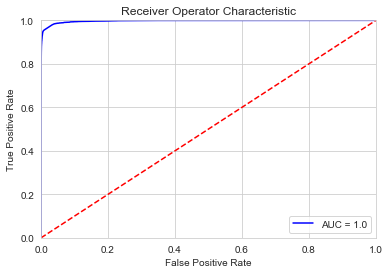

In [103]:
preds = predictProbTrain[:,1]
fpr, tpr, threshold = roc_curve(ytr, preds)
roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(8,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [104]:
log_loss(ytr,predictProbTrain[:,1])

0.17741810579514974

# Testing Error

In [105]:
predictTest = rfc.predict(xts)
predictTest

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [106]:
con = pd.DataFrame(data=confusion_matrix(yts,predictTest), columns=['P NO','P YES'], index=['A NO','A YES'])
con

,P NO,P YES
A NO,4502,1918
A YES,1829,4252


In [107]:
print(classification_report(yts,predictTest))

              precision    recall  f1-score   support

           0       0.71      0.70      0.71      6420
           1       0.69      0.70      0.69      6081

    accuracy                           0.70     12501
   macro avg       0.70      0.70      0.70     12501
weighted avg       0.70      0.70      0.70     12501



In [108]:
accuracy_score(yts,predictTest)

0.7002639788816895

In [109]:
predictProbTest = rfc.predict_proba(xts)
predictProbTest

array([[0.68  , 0.32  ],
       [0.45  , 0.55  ],
       [0.79  , 0.21  ],
       ...,
       [0.31  , 0.69  ],
       [0.62  , 0.38  ],
       [0.7295, 0.2705]])

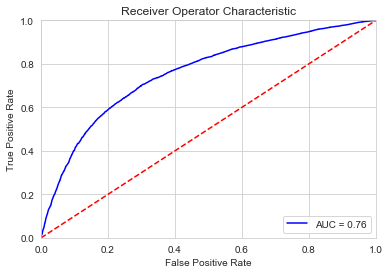

In [110]:
preds = predictProbTest[:,1]
fpr, tpr, threshold = roc_curve(yts, preds)
roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(8,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [111]:
log_loss(yts,predictProbTest[:,1])

0.6597977538016006

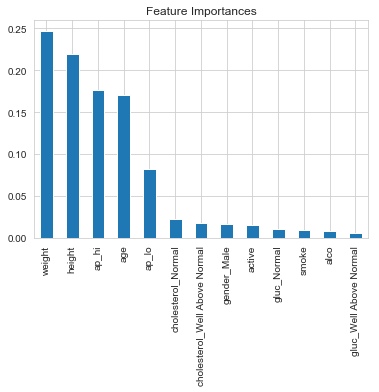

In [112]:
coef1 = pd.Series(rfc.feature_importances_, xtr.columns).sort_values(ascending=False)
coef1.plot(kind='bar', title='Feature Importances')

# K FOLD

In [113]:
def calc_train_error(xtr,ytr,model):
    predictions= model.predict(xtr)
    predictProba = model.predict_proba(xtr)
    accuracy = accuracy_score(ytr,predictions)
    f1 = f1_score(ytr, predictions, average='macro')
    roc_auc= roc_auc_score(ytr, predictProba[:,1])
    logloss = log_loss(ytr,predictProba)
    report = classification_report(ytr, predictions)
    return {
        'report':report,
        'f1':f1,
        'roc':roc_auc,
        'accuracy':accuracy,
        'logloss':logloss
    }

def calc_validation_error(xts,yts,model):
    predictions= model.predict(xts)
    predictProba = model.predict_proba(xts)
    accuracy = accuracy_score(yts,predictions)
    f1 = f1_score(yts, predictions, average='macro')
    roc_auc= roc_auc_score(yts, predictProba[:,1])
    logloss = log_loss(yts,predictProba)
    report = classification_report(yts, predictions)
    return {
        'report':report,
        'f1':f1,
        'roc':roc_auc,
        'accuracy':accuracy,
        'logloss':logloss
    }

def calc_metrics(xtr,ytr,xts,yts,model):
    model.fit(xtr,ytr)
    train_error = calc_train_error(xtr,ytr,model)
    validation_error = calc_validation_error(xts,yts,model)
    return train_error, validation_error

In [114]:
from sklearn.model_selection import KFold
k=10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [115]:
data = dfTrain.drop('cardio',axis=1)
target = dfTrain['cardio']

In [116]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data,target):
    
    xtr,xval = data.iloc[train_index], data.iloc[val_index]
    ytr,yval = target.iloc[train_index], target.iloc[val_index]
    
    train_error, val_error = calc_metrics(xtr,ytr,xval,yval,rfc)
    
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [117]:
import numpy as np
listItem = []

for tr,val in zip(train_errors,validation_errors):
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],tr['logloss'],val['logloss']])

dfEvaluate = pd.DataFrame(listItem,
                         columns=['Train Accuracy',
                                 'Test Accuracy',
                                  'Train ROC AUC',
                                  'Test ROC AUC',
                                  'Train F1',
                                  'Test F1',
                                  'Train Logloss',
                                  'Test Logloss'
                                 ])


dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1,Test F1,Train Logloss,Test Logloss
0,0.971646,0.703088,0.996660,0.757195,0.971634,0.702885,0.179662,0.673146
1,0.971931,0.687090,0.996660,0.743228,0.971919,0.686726,0.178747,0.709146
2,0.971131,0.693969,0.996550,0.754672,0.971117,0.693949,0.179935,0.701018
3,0.972446,0.693809,0.996714,0.750703,0.972432,0.693778,0.178626,0.650541
4,0.971824,0.701008,0.996682,0.755815,0.971809,0.700961,0.179400,0.710869
5,0.971700,0.704640,0.996651,0.756284,0.971689,0.704542,0.179621,0.679676
6,0.971789,0.694560,0.996654,0.753689,0.971779,0.694426,0.179310,0.715029
7,0.972038,0.690240,0.996683,0.749295,0.972025,0.690205,0.179161,0.684449
8,0.971558,0.696640,0.996596,0.752155,0.971547,0.696556,0.179561,0.667922
9,0.971789,0.694560,0.996738,0.748478,0.971777,0.694525,0.178758,0.730178


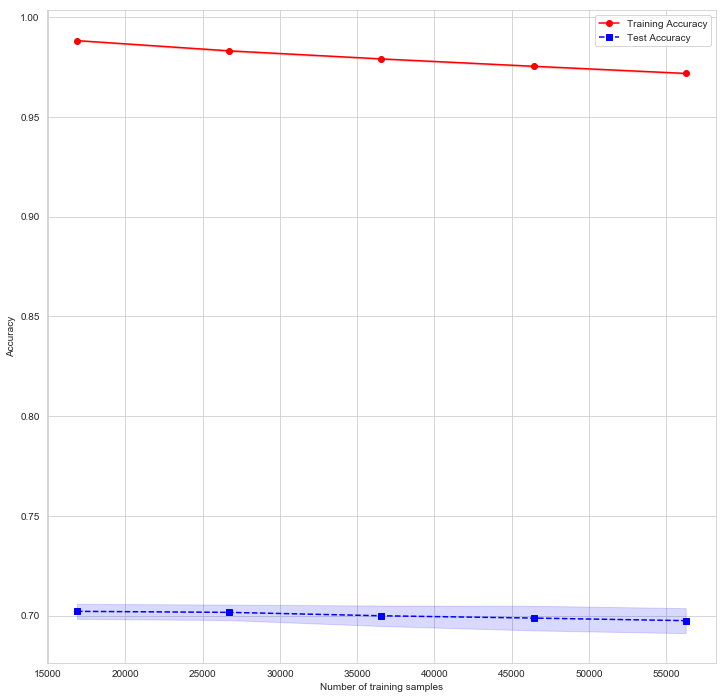

In [118]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=rfc,
                                                       X=data,
                                                       y=target,
                                                       train_sizes=np.linspace(0.3,1.0,5),
                                                       cv=10, scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)

train_std = np.std(train_scores, axis=1)

test_mean= np.mean(test_scores,axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(12,12))
#Plot training accuracies
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
#Plot for the variance
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='red')

#Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s',label='Test Accuracy')

plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Modeling w/ GridCV

In [119]:
from sklearn.model_selection import GridSearchCV

parameters = {'class_weight':({0:1,1:5},{0:1,1:7},{0:1,1:10}),
             'min_samples_leaf':(15,20,25)}
rfc = RandomForestClassifier(n_estimators=100,random_state=101)
dt = GridSearchCV(rfc, parameters, scoring=['recall','roc_auc'],
                 refit='recall',cv=5)
dt.fit(xtr,ytr)
dt.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 10},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=25,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=101, verbose=0, warm_start=False)

In [120]:
rfc = dt.best_estimator_

# Evaluate Model
## Train Error

In [121]:
predictTrain = rfc.predict(xtr)
predictTrain

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [122]:
con = pd.DataFrame(data=confusion_matrix(ytr,predictTrain), columns=['P NO','P YES'], index=['A NO','A YES'])
con

,P NO,P YES
A NO,1353,27084
A YES,40,27778


In [123]:
print(classification_report(ytr,predictTrain))

              precision    recall  f1-score   support

           0       0.97      0.05      0.09     28437
           1       0.51      1.00      0.67     27818

    accuracy                           0.52     56255
   macro avg       0.74      0.52      0.38     56255
weighted avg       0.74      0.52      0.38     56255



In [124]:
accuracy_score(ytr,predictTrain)

0.5178384143631677

In [125]:
predictProbTrain = rfc.predict_proba(xtr)
predictProbTrain

array([[0.33214786, 0.66785214],
       [0.02089098, 0.97910902],
       [0.03642377, 0.96357623],
       ...,
       [0.26714046, 0.73285954],
       [0.05005064, 0.94994936],
       [0.15511416, 0.84488584]])

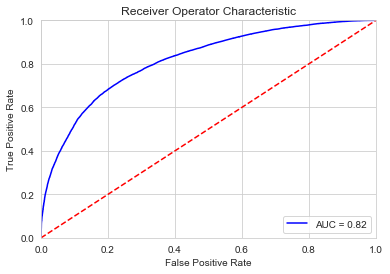

In [126]:
preds = predictProbTrain[:,1]
fpr, tpr, threshold = roc_curve(ytr, preds)
roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(8,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [127]:
log_loss(ytr,predictProbTrain[:,1])

0.9449579181645297

# Test Error

In [128]:
predictTest = rfc.predict(xts)
predictTest

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [129]:
con = pd.DataFrame(data=confusion_matrix(yts,predictTest), columns=['P NO','P YES'], index=['A NO','A YES'])
con

,P NO,P YES
A NO,298,6122
A YES,10,6071


In [130]:
print(classification_report(yts,predictTest))

              precision    recall  f1-score   support

           0       0.97      0.05      0.09      6420
           1       0.50      1.00      0.66      6081

    accuracy                           0.51     12501
   macro avg       0.73      0.52      0.38     12501
weighted avg       0.74      0.51      0.37     12501



In [131]:
accuracy_score(yts,predictTest)

0.5094792416606672

In [132]:
predictProbTest = rfc.predict_proba(xts)
predictProbTest

array([[0.10457516, 0.89542484],
       [0.07273861, 0.92726139],
       [0.11723447, 0.88276553],
       ...,
       [0.02957293, 0.97042707],
       [0.07350587, 0.92649413],
       [0.45916762, 0.54083238]])

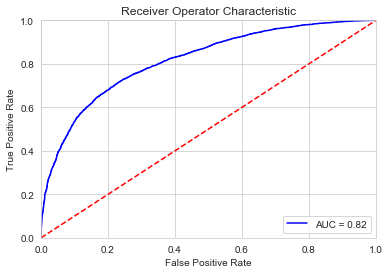

In [133]:
preds = predictProbTest[:,1]
fpr, tpr, threshold = roc_curve(yts, preds)
roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(8,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [134]:
log_loss(yts,predictProbTest[:,1])

0.9643567576936094

In [135]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data,target):
    
    xtr,xval = data.iloc[train_index], data.iloc[val_index]
    ytr,yval = target.iloc[train_index], target.iloc[val_index]
    
    train_error, val_error = calc_metrics(xtr,ytr,xval,yval,rfc)
    
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [136]:
import numpy as np
listItem = []

for tr,val in zip(train_errors,validation_errors):
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],tr['logloss'],val['logloss']])

dfEvaluate = pd.DataFrame(listItem,
                         columns=['Train Accuracy',
                                 'Test Accuracy',
                                  'Train ROC AUC',
                                  'Test ROC AUC',
                                  'Train F1',
                                  'Test F1',
                                  'Train Logloss',
                                  'Test Logloss'
                                 ])


dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1,Test F1,Train Logloss,Test Logloss
0,0.518541,0.507919,0.816556,0.798067,0.382870,0.370935,0.946615,0.968041
1,0.519536,0.512398,0.817385,0.786702,0.385038,0.379258,0.945967,0.975376
2,0.516799,0.528235,0.817258,0.795258,0.381850,0.390448,0.945382,0.940078
3,0.518025,0.522796,0.817249,0.794876,0.383746,0.384868,0.945166,0.957555
4,0.515608,0.519597,0.816193,0.797562,0.378858,0.378798,0.948306,0.949501
5,0.516683,0.507360,0.815968,0.799848,0.378871,0.370164,0.947714,0.973349
6,0.519029,0.512320,0.816686,0.797569,0.384054,0.380155,0.946757,0.973158
7,0.515474,0.514400,0.816753,0.793848,0.377720,0.370403,0.947334,0.968258
8,0.518194,0.511200,0.816863,0.798259,0.382682,0.373154,0.946115,0.971523
9,0.517838,0.506560,0.817402,0.789610,0.381327,0.368296,0.944958,0.997079


# Feature Importances

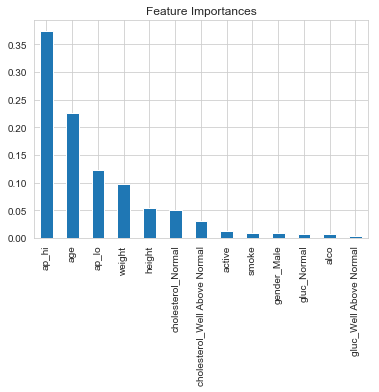

In [137]:
coef1 = pd.Series(rfc.feature_importances_, xtr.columns).sort_values(ascending=False)
coef1.plot(kind='bar', title='Feature Importances')

# Train Test Split

In [138]:
df = dfTrain.drop(['cholesterol_Normal','cholesterol_Well Above Normal','active','smoke','gender_Male','gluc_Normal','alco','gluc_Well Above Normal'],axis=1)
df.head()

,age,height,weight,ap_hi,ap_lo,cardio
0,50,168,62.0,110,80,0
1,55,156,85.0,140,90,1
2,52,165,64.0,130,70,1
3,48,169,82.0,150,100,1
5,60,151,67.0,120,80,0


In [139]:
xtr, xts, ytr, yts = train_test_split(df.drop(['cardio'],axis=1), df['cardio'], test_size=.2,random_state=101)

In [140]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(xtr,ytr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Evaluate Model
## Train Error

In [141]:
predictTrain = rfc.predict(xtr)
predictTrain

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [142]:
con = pd.DataFrame(data=confusion_matrix(ytr,predictTrain), columns=['P NO','P YES'], index=['A NO','A YES'])
con

,P NO,P YES
A NO,23902,1313
A YES,2197,22592


In [143]:
print(classification_report(ytr,predictTrain))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     25215
           1       0.95      0.91      0.93     24789

    accuracy                           0.93     50004
   macro avg       0.93      0.93      0.93     50004
weighted avg       0.93      0.93      0.93     50004



In [144]:
accuracy_score(ytr,predictTrain)

0.9298056155507559

In [145]:
predictProbTrain = rfc.predict_proba(xtr)

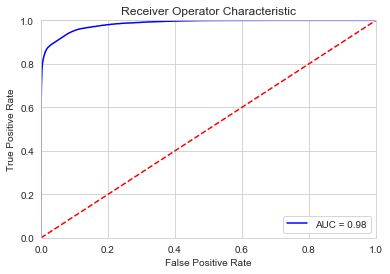

In [146]:
preds = predictProbTrain[:,1]
fpr, tpr, threshold = roc_curve(ytr, preds)
roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(8,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [147]:
log_loss(ytr,predictProbTrain[:,1])

0.22889805788139445

## Testing Error

In [148]:
predictTrain = rfc.predict(xts)
predictTrain

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [149]:
con = pd.DataFrame(data=confusion_matrix(yts,predictTrain), columns=['P NO','P YES'], index=['A NO','A YES'])
con

,P NO,P YES
A NO,4360,2060
A YES,2052,4029


In [150]:
print(classification_report(yts,predictTrain))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68      6420
           1       0.66      0.66      0.66      6081

    accuracy                           0.67     12501
   macro avg       0.67      0.67      0.67     12501
weighted avg       0.67      0.67      0.67     12501



In [151]:
accuracy_score(yts,predictTrain)

0.6710663146948244

In [152]:
predictProbTrain = rfc.predict_proba(xts)

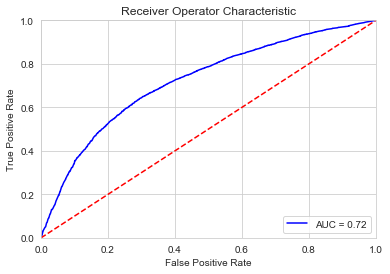

In [153]:
preds = predictProbTrain[:,1]
fpr, tpr, threshold = roc_curve(yts, preds)
roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(8,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [154]:
log_loss(yts,predictProbTrain[:,1])

0.8449475434036634

# Training Model Logistic Regression

In [155]:
from sklearn.linear_model import LogisticRegression

In [156]:
lrm = LogisticRegression(random_state=101, max_iter=10000,solver='lbfgs')

In [157]:
lrm.fit(xtr,ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=101, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [158]:
predictTrain = lrm.predict(xtr)
predictTrain

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [159]:
con = pd.DataFrame(data=confusion_matrix(ytr,predictTrain), columns=['P NO','P YES'], index=['A NO','A YES'])
con

,P NO,P YES
A NO,19618,5597
A YES,8632,16157


In [160]:
print(classification_report(ytr,predictTrain))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73     25215
           1       0.74      0.65      0.69     24789

    accuracy                           0.72     50004
   macro avg       0.72      0.71      0.71     50004
weighted avg       0.72      0.72      0.71     50004



In [161]:
accuracy_score(ytr,predictTrain)

0.7154427645788337

In [162]:
predictProbTrain = lrm.predict_proba(xtr)
predictProbTrain

array([[0.39199578, 0.60800422],
       [0.43092099, 0.56907901],
       [0.47097869, 0.52902131],
       ...,
       [0.92341905, 0.07658095],
       [0.81033179, 0.18966821],
       [0.85469679, 0.14530321]])

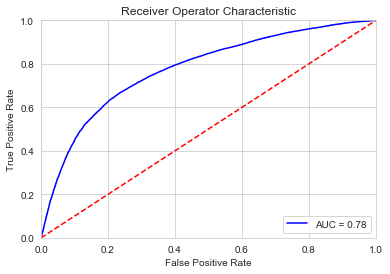

In [163]:
preds = predictProbTrain[:,1]
fpr, tpr, threshold = roc_curve(ytr, preds)
roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(8,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [164]:
log_loss(ytr,predictProbTrain[:,1])

0.5725243138936227

# Test Error

In [165]:
predictTrain = lrm.predict(xts)
predictTrain

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [166]:
con = pd.DataFrame(data=confusion_matrix(yts,predictTrain), columns=['P NO','P YES'], index=['A NO','A YES'])
con

,P NO,P YES
A NO,4956,1464
A YES,2082,3999


In [167]:
print(classification_report(yts,predictTrain))

              precision    recall  f1-score   support

           0       0.70      0.77      0.74      6420
           1       0.73      0.66      0.69      6081

    accuracy                           0.72     12501
   macro avg       0.72      0.71      0.71     12501
weighted avg       0.72      0.72      0.72     12501



In [168]:
accuracy_score(yts,predictTrain)

0.7163426925845933

In [169]:
predictProbTrain = lrm.predict_proba(xts)
predictProbTrain

array([[0.45818783, 0.54181217],
       [0.6814053 , 0.3185947 ],
       [0.64722493, 0.35277507],
       ...,
       [0.15426982, 0.84573018],
       [0.54014178, 0.45985822],
       [0.87459788, 0.12540212]])

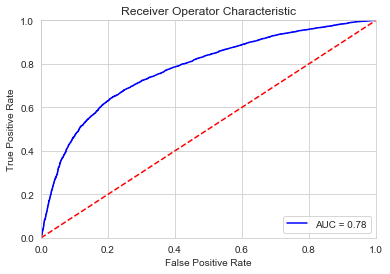

In [170]:
preds = predictProbTrain[:,1]
fpr, tpr, threshold = roc_curve(yts, preds)
roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(8,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [171]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data,target):
    
    xtr,xval = data.iloc[train_index], data.iloc[val_index]
    ytr,yval = target.iloc[train_index], target.iloc[val_index]
    
    train_error, val_error = calc_metrics(xtr,ytr,xval,yval,lrm)
    
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [172]:
import numpy as np
listItem = []

for tr,val in zip(train_errors,validation_errors):
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],tr['logloss'],val['logloss']])

dfEvaluate = pd.DataFrame(listItem,
                         columns=['Train Accuracy',
                                 'Test Accuracy',
                                  'Train ROC AUC',
                                  'Test ROC AUC',
                                  'Train F1',
                                  'Test F1',
                                  'Train Logloss',
                                  'Test Logloss'
                                 ])


dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1,Test F1,Train Logloss,Test Logloss
0,0.724020,0.728044,0.787416,0.788109,0.722491,0.725835,0.562111,0.559634
1,0.725122,0.717165,0.788367,0.779416,0.723610,0.715078,0.561345,0.566501
2,0.724055,0.724684,0.787301,0.788463,0.722351,0.723506,0.561704,0.563571
3,0.724500,0.724844,0.787334,0.789064,0.722830,0.723707,0.562023,0.560476
4,0.724251,0.721805,0.787064,0.791264,0.722592,0.720531,0.562491,0.556357
5,0.723776,0.729440,0.787020,0.791540,0.722266,0.727290,0.562171,0.559160
6,0.723953,0.727360,0.787514,0.787390,0.722405,0.725888,0.561832,0.562041
7,0.724487,0.723840,0.787679,0.785765,0.722868,0.722527,0.561636,0.563980
8,0.724647,0.725600,0.787284,0.789295,0.723114,0.723811,0.562123,0.559579
9,0.725287,0.719520,0.788057,0.782408,0.723772,0.718180,0.560977,0.569900


# XGBoost Model
## Train Error

In [173]:
import xgboost
from xgboost.sklearn import XGBClassifier

In [174]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(xtr,ytr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [190]:
predictTrain = xgb.predict(xtr)
predictProba = xgb.predict_proba(xtr)
predictTrain = []
for i in predictProba[:,1]:
    if i > 0.08:
        predictTrain.append(1)
    else:
        predictTrain.append(0)

In [191]:
con = pd.DataFrame(data=confusion_matrix(ytr,predictTrain), columns=['P NO','P YES'], index=['A NO','A YES'])
con

,P NO,P YES
A NO,617,27820
A YES,25,27793


In [192]:
print(classification_report(ytr,predictTrain))

              precision    recall  f1-score   support

           0       0.96      0.02      0.04     28437
           1       0.50      1.00      0.67     27818

    accuracy                           0.51     56255
   macro avg       0.73      0.51      0.35     56255
weighted avg       0.73      0.51      0.35     56255



In [193]:
accuracy_score(ytr,predictTrain)

0.5050217758421474

In [194]:
predictProbTrain = xgb.predict_proba(xtr)

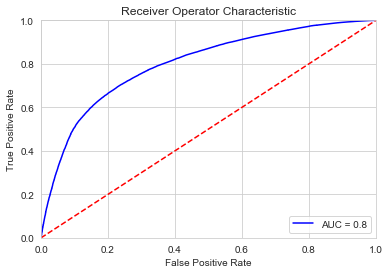

In [195]:
preds = predictProbTrain[:,1]
fpr, tpr, threshold = roc_curve(ytr, preds)
roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(8,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Test Error

In [142]:
print(classification_report(yts,predictTrain))

              precision    recall  f1-score   support

           0       0.88      0.23      0.36      7045
           1       0.55      0.97      0.70      6955

    accuracy                           0.59     14000
   macro avg       0.71      0.60      0.53     14000
weighted avg       0.71      0.59      0.53     14000



In [143]:
accuracy_score(yts,predictTrain)

0.5945

In [144]:
predictProbTrain = xgb.predict_proba(xts)

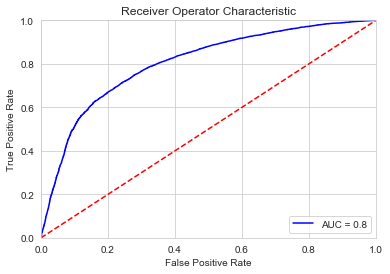

In [145]:
preds = predictProbTrain[:,1]
fpr, tpr, threshold = roc_curve(yts, preds)
roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(8,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [266]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data,target):
    
    xtr,xval = data.iloc[train_index], data.iloc[val_index]
    ytr,yval = target.iloc[train_index], target.iloc[val_index]
    
    train_error, val_error = calc_metrics(xtr,ytr,xval,yval,xgb)
    
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [267]:
import numpy as np
listItem = []

for tr,val in zip(train_errors,validation_errors):
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],tr['logloss'],val['logloss']])

dfEvaluate = pd.DataFrame(listItem,
                         columns=['Train Accuracy',
                                 'Test Accuracy',
                                  'Train ROC AUC',
                                  'Test ROC AUC',
                                  'Train F1',
                                  'Test F1',
                                  'Train Logloss',
                                  'Test Logloss'
                                 ])


dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1,Test F1,Train Logloss,Test Logloss
0,0.732197,0.737482,0.799782,0.798864,0.731369,0.736348,0.543024,0.541862
1,0.732837,0.727084,0.801235,0.788756,0.732106,0.725978,0.541496,0.553739
2,0.732392,0.728044,0.800073,0.796741,0.731441,0.727420,0.542433,0.548746
3,0.733388,0.730763,0.800370,0.796277,0.732561,0.730289,0.542356,0.546663
4,0.733335,0.725964,0.799851,0.798701,0.732480,0.725373,0.542924,0.543787
5,0.732095,0.738720,0.799641,0.800835,0.731240,0.737413,0.543122,0.541385
6,0.732184,0.733120,0.799793,0.799645,0.731413,0.732365,0.542984,0.542963
7,0.733197,0.730560,0.800412,0.795842,0.732316,0.729852,0.542271,0.547290
8,0.732842,0.727040,0.799884,0.797374,0.732066,0.726027,0.542893,0.544217
9,0.733108,0.726560,0.800791,0.791239,0.732414,0.725941,0.541862,0.552903


# XGBoost With GridCV

In [95]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':(3,4,5),
             'min_child_weight':(5,10,15),
             'gamma':(.5,1,1.5),
             'subsample':(.6,.8,1)}
xgb = XGBClassifier(n_estimators=100,random_state=101)
dt = GridSearchCV(xgb, parameters, scoring=['recall','roc_auc'],
                 refit='recall',cv=5)
dt.fit(xtr,ytr)
dt.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=10, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=101,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [96]:
xgb = dt.best_estimator_

## Train Error

In [97]:
predictTrain = xgb.predict(xtr)

In [98]:
con = pd.DataFrame(data=confusion_matrix(ytr,predictTrain), columns=['P NO','P YES'], index=['A NO','A YES'])
con

,P NO,P YES
A NO,19490,5725
A YES,7681,17108


In [99]:
print(classification_report(ytr,predictTrain))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74     25215
           1       0.75      0.69      0.72     24789

    accuracy                           0.73     50004
   macro avg       0.73      0.73      0.73     50004
weighted avg       0.73      0.73      0.73     50004



In [100]:
accuracy_score(ytr,predictTrain)

0.7319014478841692

In [101]:
predictProbTrain = xgb.predict_proba(xtr)

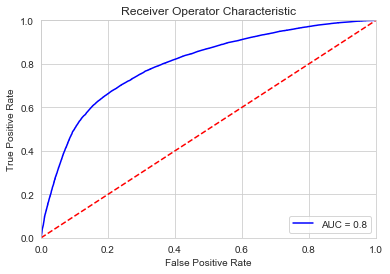

In [102]:
preds = predictProbTrain[:,1]
fpr, tpr, threshold = roc_curve(ytr, preds)
roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(8,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Test Error

In [103]:
predictTrain = xgb.predict(xts)

In [104]:
con = pd.DataFrame(data=confusion_matrix(yts,predictTrain), columns=['P NO','P YES'], index=['A NO','A YES'])
con

,P NO,P YES
A NO,4917,1503
A YES,1815,4266


In [105]:
print(classification_report(yts,predictTrain))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75      6420
           1       0.74      0.70      0.72      6081

    accuracy                           0.73     12501
   macro avg       0.73      0.73      0.73     12501
weighted avg       0.73      0.73      0.73     12501



In [106]:
accuracy_score(yts,predictTrain)

0.7345812335013199

In [107]:
predictProbTrain = xgb.predict_proba(xts)

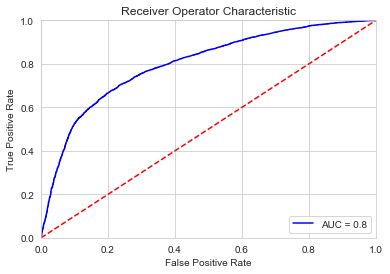

In [108]:
preds = predictProbTrain[:,1]
fpr, tpr, threshold = roc_curve(yts, preds)
roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(8,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()